##Objective
###### Modularize the code into python files for RESNET-18 architecture on CIFAR-10 dataset

##Import Packages
##### Python libraries required for CIFAR10

In [0]:
from torchsummary import summary
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import StepLR

###### Packages from Modules 

In [0]:
from train import train
from test import test
from data import CIFAR10
from cuda import initialze_cuda
from resnet import ResNet18
from plot import plot_metric
from results import display

##Initialize Cuda
##### Set up the seed value for the machine

In [3]:
cuda, device = initialze_cuda(1)

Is CUDA Available? True


## Initialize Hyperparameters
##### Assigning various parameters required by the dataset and model

In [0]:
class Args:
    
    cuda = cuda
    batch_size = 64
    num_workers = 4
    horizontal_flip = 0.2
    vertical_flip = 0.1
    rotation = 10
    random_erasing = 0.3

    learning_rate = 0.01
    momentum = 0.9
    lr_step = 25
    lr_gamma = 0.1
    epochs = 50

###Intialize CIFAR-10 dataset

In [5]:
cifar10 = CIFAR10(cuda= Args.cuda,
                  batch_size = Args.batch_size,
                  num_workers = Args.num_workers,
                  horizontal_flip = Args.horizontal_flip, 
                  vertical_flip = Args.vertical_flip, 
                  rotation = Args.rotation,
                  cutout = 0.0,
                  random_erasing = Args.random_erasing,
                  guassian_blur = 0.0)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


##Visualizing images from the CIFAR-10 Dataset
##### These images can help one realise which image augmentation techniques are the best for the given dataset

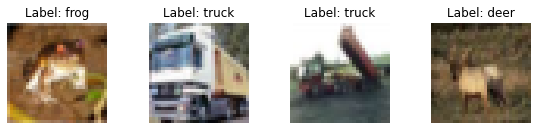

In [6]:
classes = cifar10.classes
sample_data, sample_targets = cifar10.data

#Dimension of the data
_ ,height,width,channels = sample_data.shape

# Set number of images to display
num_images = 4

# Display images with labels
fig, axs = plt.subplots(1, 4, figsize=(8, 8))
fig.tight_layout()

for i in range(num_images):
    axs[i].axis('off')
    axs[i].set_title(f'Label: {classes[sample_targets[i]]}')
    axs[i].imshow(sample_data[i])

###Load data on Dataloader

In [0]:
train_loader = cifar10.dataloader(train = True)
test_loader = cifar10.dataloader(train = False)

##Architecture 
#####Load the model architecture on the device 
#####Summary of the Architecture

In [8]:
model = ResNet18().to(device)
summary(model, cifar10.input_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

#Model Training and Validation
##### Train the Resnet-18 achitecture 

In [9]:
losses = []
accuracies = []

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=Args.learning_rate, momentum=Args.momentum)
scheduler = StepLR(optimizer, Args.lr_step, Args.lr_gamma)
epochs = Args.epochs

for epoch in range(1, epochs + 1):
    print(f'Epoch {epoch}:')
    train(model, train_loader, device, optimizer, criterion)
    scheduler.step()
    test(model, test_loader, device, criterion, losses, accuracies)

  0%|          | 0/782 [00:00<?, ?it/s]

Epoch 1:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0171, Accuracy: 6018/10000 (60.18%)

Epoch 2:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0135, Accuracy: 6993/10000 (69.93%)

Epoch 3:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0122, Accuracy: 7262/10000 (72.62%)

Epoch 4:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0096, Accuracy: 7936/10000 (79.36%)

Epoch 5:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0093, Accuracy: 7994/10000 (79.94%)

Epoch 6:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0087, Accuracy: 8115/10000 (81.15%)

Epoch 7:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0073, Accuracy: 8407/10000 (84.07%)

Epoch 8:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0077, Accuracy: 8343/10000 (83.43%)

Epoch 9:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0075, Accuracy: 8464/10000 (84.64%)

Epoch 10:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0071, Accuracy: 8465/10000 (84.65%)

Epoch 11:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0063, Accuracy: 8637/10000 (86.37%)

Epoch 12:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0067, Accuracy: 8612/10000 (86.12%)

Epoch 13:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0067, Accuracy: 8630/10000 (86.30%)

Epoch 14:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0063, Accuracy: 8702/10000 (87.02%)

Epoch 15:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0064, Accuracy: 8706/10000 (87.06%)

Epoch 16:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0067, Accuracy: 8633/10000 (86.33%)

Epoch 17:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0062, Accuracy: 8756/10000 (87.56%)

Epoch 18:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0058, Accuracy: 8812/10000 (88.12%)

Epoch 19:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0063, Accuracy: 8738/10000 (87.38%)

Epoch 20:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0060, Accuracy: 8787/10000 (87.87%)

Epoch 21:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0067, Accuracy: 8733/10000 (87.33%)

Epoch 22:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0062, Accuracy: 8778/10000 (87.78%)

Epoch 23:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0060, Accuracy: 8848/10000 (88.48%)

Epoch 24:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0058, Accuracy: 8893/10000 (88.93%)

Epoch 25:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0058, Accuracy: 8911/10000 (89.11%)

Epoch 26:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0048, Accuracy: 9062/10000 (90.62%)

Epoch 27:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0047, Accuracy: 9080/10000 (90.80%)

Epoch 28:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0046, Accuracy: 9100/10000 (91.00%)

Epoch 29:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0046, Accuracy: 9113/10000 (91.13%)

Epoch 30:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0047, Accuracy: 9106/10000 (91.06%)

Epoch 31:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0048, Accuracy: 9093/10000 (90.93%)

Epoch 32:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0047, Accuracy: 9100/10000 (91.00%)

Epoch 33:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0046, Accuracy: 9106/10000 (91.06%)

Epoch 34:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0047, Accuracy: 9123/10000 (91.23%)

Epoch 35:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0047, Accuracy: 9102/10000 (91.02%)

Epoch 36:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0046, Accuracy: 9114/10000 (91.14%)

Epoch 37:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0047, Accuracy: 9092/10000 (90.92%)

Epoch 38:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0047, Accuracy: 9112/10000 (91.12%)

Epoch 39:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0047, Accuracy: 9121/10000 (91.21%)

Epoch 40:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0047, Accuracy: 9109/10000 (91.09%)

Epoch 41:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0047, Accuracy: 9110/10000 (91.10%)

Epoch 42:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0047, Accuracy: 9098/10000 (90.98%)

Epoch 43:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0048, Accuracy: 9106/10000 (91.06%)

Epoch 44:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0048, Accuracy: 9123/10000 (91.23%)

Epoch 45:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0048, Accuracy: 9111/10000 (91.11%)

Epoch 46:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0048, Accuracy: 9120/10000 (91.20%)

Epoch 47:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0048, Accuracy: 9111/10000 (91.11%)

Epoch 48:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0048, Accuracy: 9097/10000 (90.97%)

Epoch 49:


  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0048, Accuracy: 9109/10000 (91.09%)

Epoch 50:


Loss=0.17 Batch ID=781 Accuracy=96.60: 100%|██████████| 782/782 [00:57<00:00, 13.52it/s]



Validation set: Average loss: 0.0048, Accuracy: 9117/10000 (91.17%)



###Plotting the loss of the model per epoch

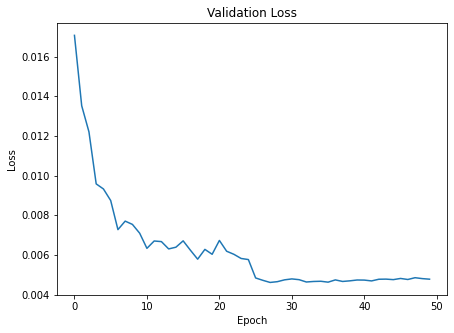

In [10]:
plot_metric(losses, 'Loss')

###Plotting the accuracy of the model per epoch

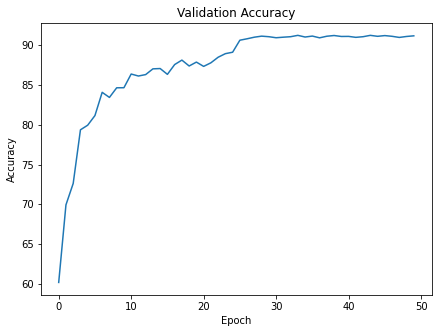

In [11]:
plot_metric(accuracies, 'Accuracy')

###Misclassified Images

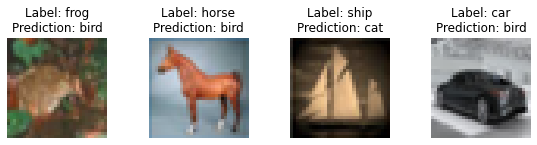

In [12]:
display(cifar10.test_data,device,model,cifar10.classes)